> **Variable Description:**

1. **aline_flg:** IAC used (binary, 1 = year, 0 = no)
2. **icu_los_day:** Length of stay in ICU (days, numeric)
3. **hospital_los_day:** Length of stay in hospital (days, numeric)
4. **age:** Age at baseline (years, numeric)
5. **gender_num:** Patient gender (1 = male; 0 = female)
6. **weight_first:** First weight (kg, numeric)
7. **bmi:** Patient BMI (numeric)
8. **sapsi_first:** First SAPS I score (numeric)
9. **sofa_first:** First SOFA score (numeric)
10. **service_unit:** Type of service unit (character: FICU, MICU, SICU)
11. **service_num:** Service as a numeric (binary: 0 = MICU or FICU, 1 = SICU)
12. **day_icu_intime:** Day of the week of ICU admission (character)
13. **day_icu_intime_num:** Day of the week of ICU admission (numeric, corresponds with day_icu_intime)
14. **hour_icu_intime:** Hour of ICU admission (numeric, hour of admission using 24hr clock)
15. **hosp_exp_flg:** Death in hospital (binary: 1 = yes, 0 = no)
16. **icu_exp_flg:** Death in ICU (binary: 1 = yes, 0 = no)
17. **day_28_flg:** Death within 28 days (binary: 1 = yes, 0 = no)
18. **mort_day_censored:** Day post ICU admission of censoring or death (days, numeric)
19. **censor_flg:** Censored or death (binary: 0 = death, 1 = censored)
20. **sepsis_flg:** Sepsis present (binary: 0 = no, 1 = yes -- absent (0) for all)
21. **chf_flg:** Congestive heart failure (binary: 0 = no, 1 = yes)
22. **afib_flg:** Atrial fibrillation (binary: 0 = no, 1 = yes)
23. **renal_flg:** Chronic renal disease (binary: 0 = no, 1 = yes)
24. **liver_flg:** Liver Disease (binary: 0 = no, 1 = yes)
25. **copd_flg:** Chronic obstructive pulmonary disease (binary: 0 = no, 1 = yes)
26. **cad_flg:** Coronary artery disease (binary: 0 = no, 1 = yes)
27. **stroke_flg:** Stroke (binary: 0 = no, 1 = yes)
28. **mal_flg:** Malignancy (binary: 0 = no, 1 = yes)
29. **resp_flg:** Respiratory disease (non-COPD) (binary: 0 = no, 1 = yes)
30. **map_1st:** Mean arterial pressure (mmHg, numeric)
31. **hr_1st:** Heart Rate (numeric)
32. **temp_1st:** Temperature (F, numeric)
33. **spo2_1st:** S_pO_2 (% , numeric)
34. **abg_count:** Arterial blood gas count (number of tests, numeric)
35. **wbc_first:** First White blood cell count (K/uL, numeric)
36. **hgb_first:** First Hemoglobin (g/dL, numeric)
37. **platelet_first:** First Platelets (K/uL, numeric)
38. **sodium_first:** First Sodium (mEq/L, numeric)
39. **potassium_first:** First Potassium (mEq/L, numeric)
40. **tco2_first:** First Bicarbonate (mEq/L, numeric)
41. **chloride_first:** First Chloride (mEq/L, numeric)
42. **bun_first:** First Blood urea nitrogen (mg/dL, numeric)
43. **creatinine_first:** First Creatinine (mg/dL, numeric)
44. **po2_first:** First PaO_2 (mmHg, numeric)
45. **pco2_first:** First PaCO_2 (mmHg, numeric)
46. **iv_day_1:** Input fluids by IV on day 1 (mL, numeric)

> **Libraries:**

In [37]:
# Data handling and processing
import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np  # NumPy for numerical operations and array manipulations
from sklearn.preprocessing import LabelEncoder  # Encoding categorical variables into numeric format
from sklearn.model_selection import train_test_split  # Splitting the data into training and test sets
from sklearn.preprocessing import StandardScaler  # Standardizing features by removing the mean and scaling to unit variance
from sklearn.decomposition import PCA  # Principal Component Analysis for dimensionality reduction


# Visualization
import matplotlib.pyplot as plt  # Matplotlib for creating static, interactive, and animated visualizations
import seaborn as sns  # Seaborn for high-level data visualization


# Machine learning
from sklearn.linear_model import LogisticRegression  # Logistic Regression algorithm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics for machine learning models

### **1. Load the data into Jupyter Notebook.:**

In [11]:
project = pd.read_csv('MIMIC_II.csv')

> **Describe data:**

In [12]:
project.head()

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_unit,...,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
0,1,7.63,13,72.36841,1,75.0,29.912791,15,9,SICU,...,354,138,4.6,15.0,109,41,1.6,196,39,2230.875000
1,1,0.58,3,44.49191,0,0.0,0.000000,21,7,SICU,...,262,139,4.2,31.0,100,16,0.5,146,23,0.000000
2,1,1.75,5,23.74217,1,95.2,28.464563,18,7,SICU,...,22,146,3.4,19.0,110,10,1.0,134,30,2358.244141
3,0,1.38,9,36.54657,1,72.0,23.982402,14,5,SICU,...,182,145,3.6,26.0,110,10,0.7,0,0,1877.560059
4,1,7.06,27,24.64717,1,90.0,25.474850,15,6,SICU,...,130,143,3.8,32.0,104,17,1.3,38,62,648.599976


### **2. Create pairwise scatterplots of variables of interest.**

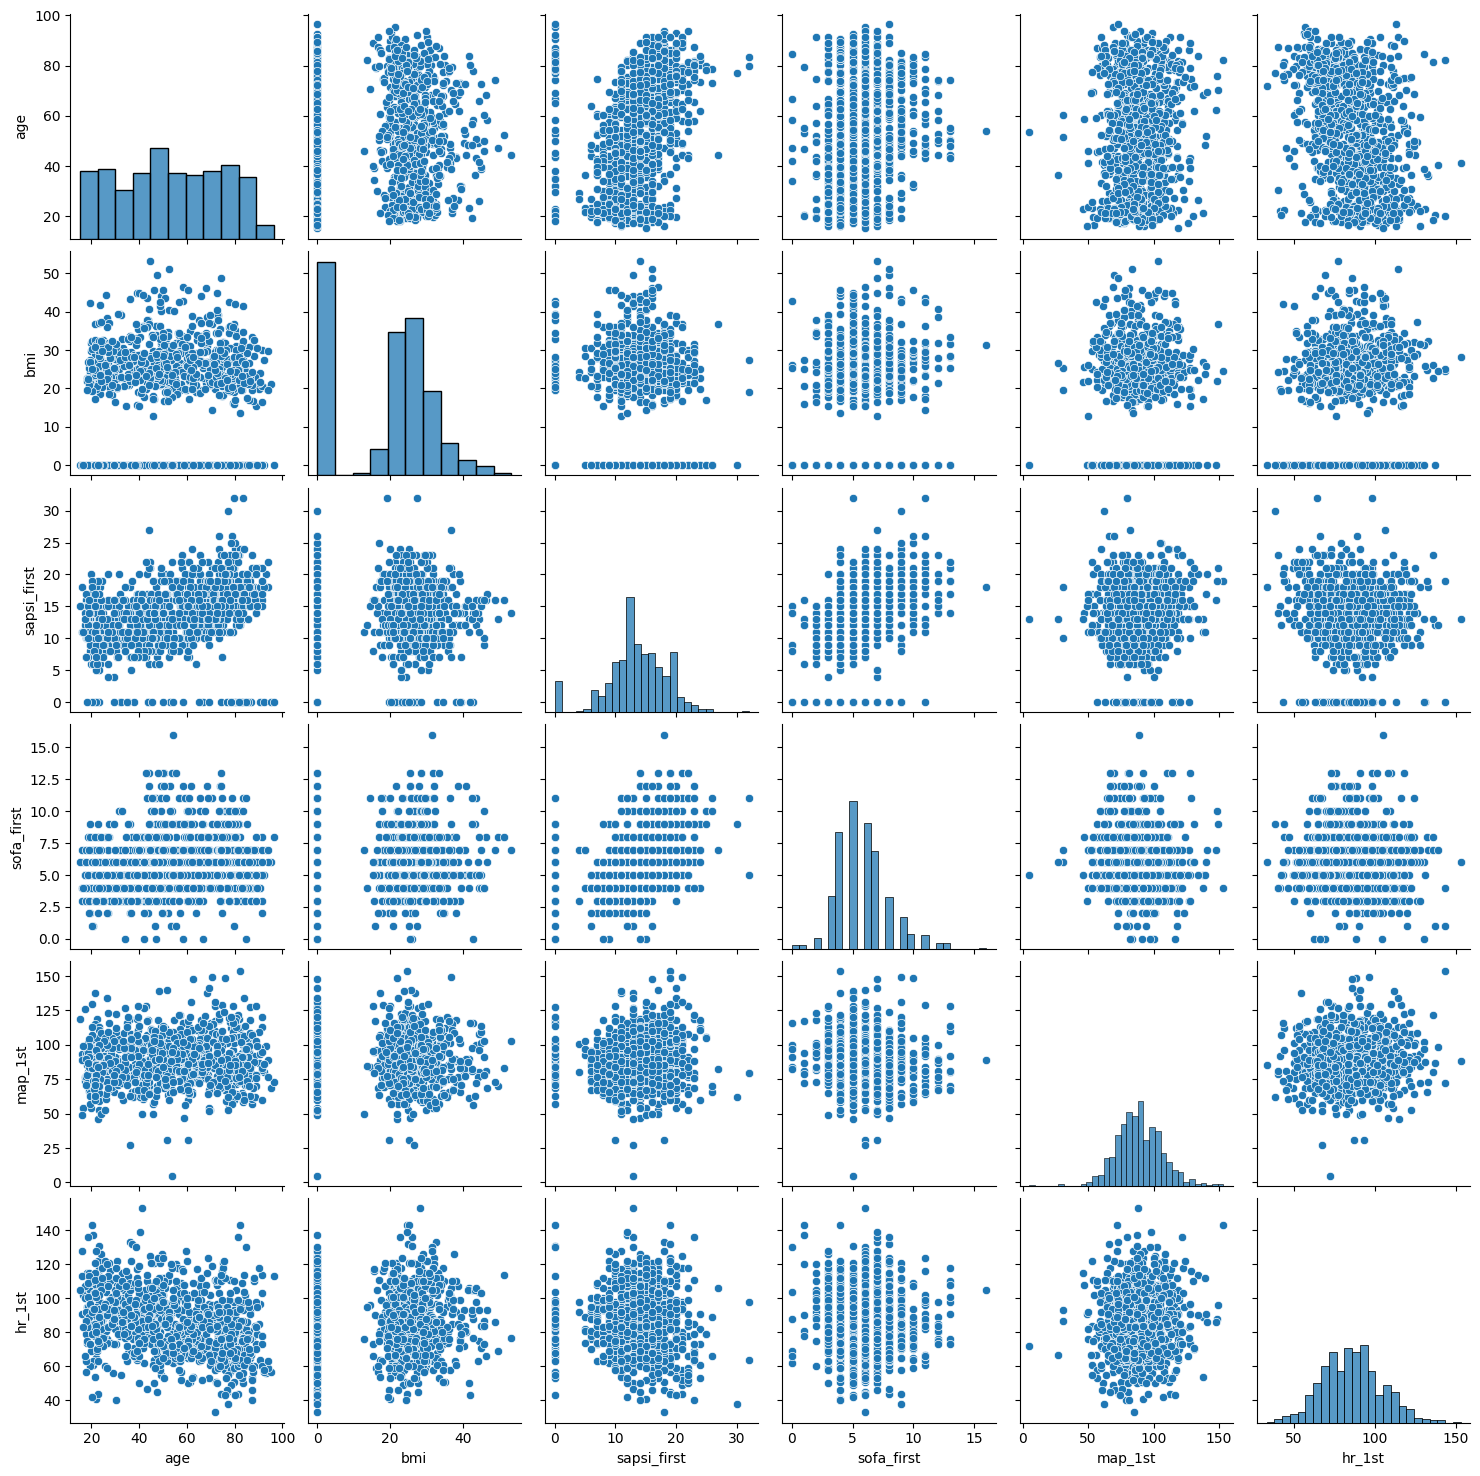

In [13]:
# Select relevant columns
selected_variables = ['age', 'bmi', 'sapsi_first', 'sofa_first', 'map_1st', 'hr_1st']
selected_data = project[selected_variables]

# Create pairwise scatterplots
sns.pairplot(selected_data)
plt.show()

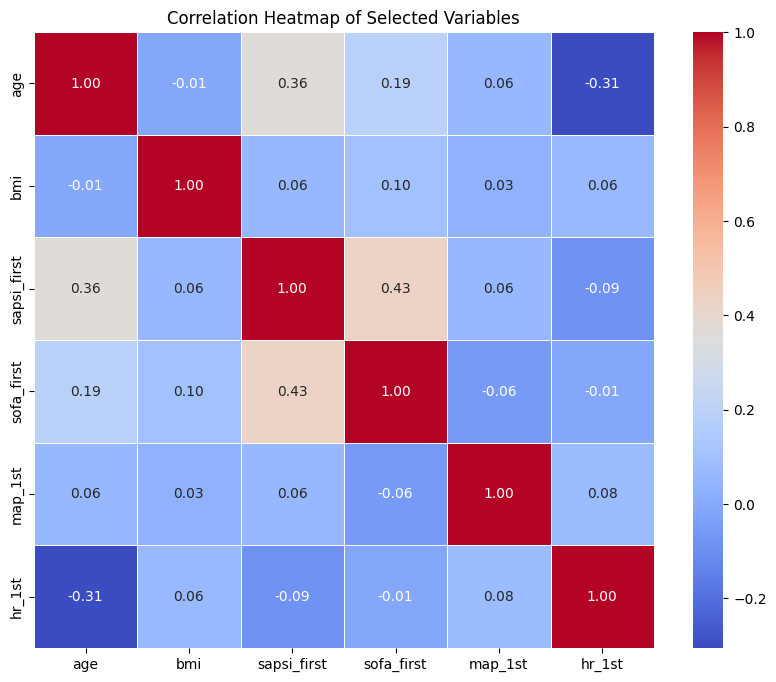

In [47]:
# Extract the selected variables
selected_data = project_clean_selected[selected_variables]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

### **3. Create box plots to identify outliers.**

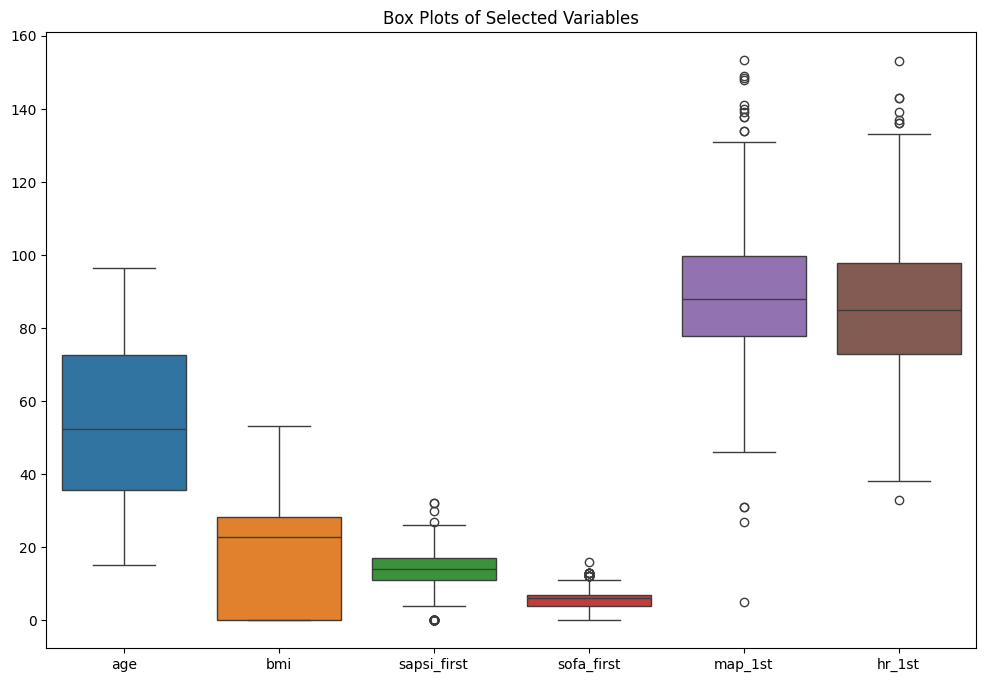

In [39]:
# Create box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=selected_data)
plt.title('Box Plots of Selected Variables')
plt.show()

### **4. Perform data cleaning and preprocessing,his might include data amputation of the extreme variables.**

In [15]:
# Check for missing values
missing_values = project.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 aline_flg             0
icu_los_day           0
hospital_los_day      0
age                   0
gender_num            0
weight_first          0
bmi                   0
sapsi_first           0
sofa_first            0
service_unit          0
service_num           0
day_icu_intime        0
day_icu_intime_num    0
hour_icu_intime       0
hosp_exp_flg          0
icu_exp_flg           0
day_28_flg            0
mort_day_censored     0
censor_flg            0
sepsis_flg            0
chf_flg               0
afib_flg              0
renal_flg             0
liver_flg             0
copd_flg              0
cad_flg               0
stroke_flg            0
mal_flg               0
resp_flg              0
map_1st               0
hr_1st                0
temp_1st              0
spo2_1st              0
abg_count             0
wbc_first             0
hgb_first             0
platelet_first        0
sodium_first          0
potassium_first       0
tco2_first            0
chloride_first        0

In [40]:
# Calculate quartiles for selected numeric columns
Q1_selected = project[selected_variables].quantile(0.25)
Q3_selected = project[selected_variables].quantile(0.75)
IQR_selected = Q3_selected - Q1_selected

# Winsorizing transformation for selected variables
project_clean_selected = project.copy()
project_clean_selected[selected_variables] = project_clean_selected[selected_variables].clip(
    lower=Q1_selected - 1.5 * IQR_selected,
    upper=Q3_selected + 1.5 * IQR_selected,
    axis=1
)

project_clean_selected.head()

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_unit,...,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
0,1,7.63,13,72.36841,1,75.0,29.912791,15,9.0,SICU,...,354,138,4.6,15.0,109,41,1.6,196,39,2230.875000
1,1,0.58,3,44.49191,0,0.0,0.000000,21,7.0,SICU,...,262,139,4.2,31.0,100,16,0.5,146,23,0.000000
2,1,1.75,5,23.74217,1,95.2,28.464563,18,7.0,SICU,...,22,146,3.4,19.0,110,10,1.0,134,30,2358.244141
3,0,1.38,9,36.54657,1,72.0,23.982402,14,5.0,SICU,...,182,145,3.6,26.0,110,10,0.7,0,0,1877.560059
4,1,7.06,27,24.64717,1,90.0,25.474850,15,6.0,SICU,...,130,143,3.8,32.0,104,17,1.3,38,62,648.599976


In [20]:
# Convert categorical data
# Initialize a dictionary to store label encoders for each categorical column
label_encoders = {}

# Iterate through categorical columns and apply label encoding
for column in project_clean_selected.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    project_clean_selected[column] = label_encoders[column].fit_transform(project_clean_selected[column].astype(str))
    

project_clean_selected.head()

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_unit,...,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
0,1,7.63,13,72.36841,1,75.0,29.912791,15,9.0,0,...,354,138,4.6,15.0,109,41,1.6,196,39,2230.875000
1,1,0.58,3,44.49191,0,0.0,0.000000,21,7.0,0,...,262,139,4.2,31.0,100,16,0.5,146,23,0.000000
2,1,1.75,5,23.74217,1,95.2,28.464563,18,7.0,0,...,22,146,3.4,19.0,110,10,1.0,134,30,2358.244141
3,0,1.38,9,36.54657,1,72.0,23.982402,14,5.0,0,...,182,145,3.6,26.0,110,10,0.7,0,0,1877.560059
4,1,7.06,27,24.64717,1,90.0,25.474850,15,6.0,0,...,130,143,3.8,32.0,104,17,1.3,38,62,648.599976


### **5. Conduct data analysis: calculate the median, mean, and standard deviation of variables of interest. Discuss the implications of the results.**

In [38]:
# Calculate median, mean, and standard deviation
median_values = project_clean_selected[selected_variables].median()
mean_values = project_clean_selected[selected_variables].mean()
std_dev_values = project_clean_selected[selected_variables].std()

# Display the results
analysis_results1 = pd.DataFrame({
    'Variable': selected_variables,
    'Median': median_values,
    'Mean': mean_values,
    'Standard Deviation': std_dev_values
})

print(analysis_results1)

                Variable     Median       Mean  Standard Deviation
age                  age  52.277470  53.144155           21.407871
bmi                  bmi  22.898715  18.620344           13.557910
sapsi_first  sapsi_first  14.000000  13.700611            4.667975
sofa_first    sofa_first   6.000000   5.806517            2.116567
map_1st          map_1st  88.000000  88.774611           16.580339
hr_1st            hr_1st  85.000000  85.718941           18.116857


### **6. Create new box plots after data imputation.**

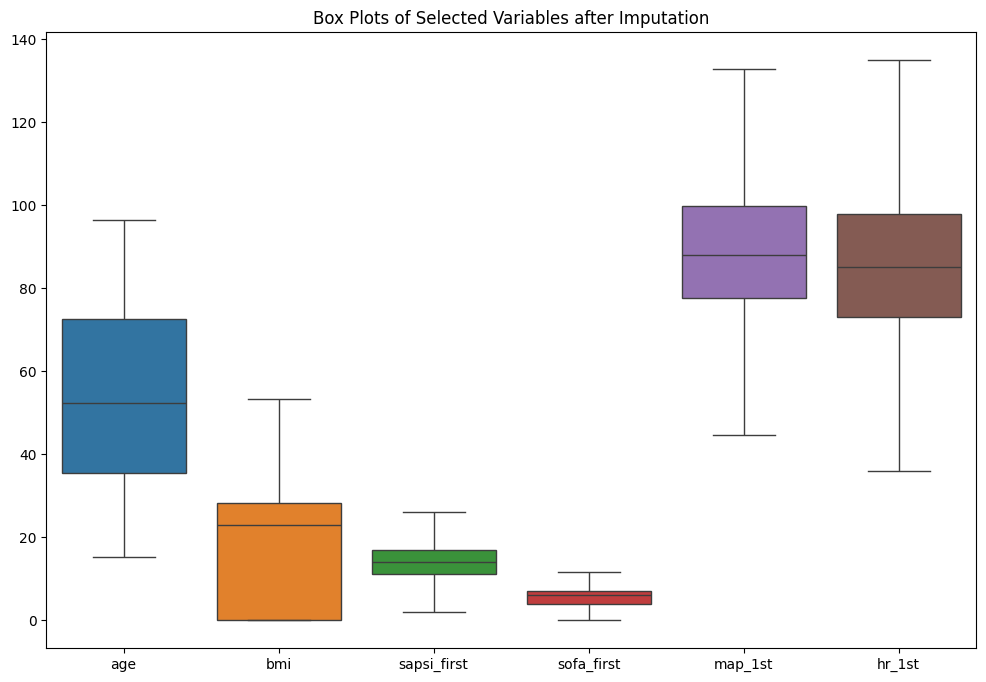

In [23]:
# Create box plots for selected variables after imputation
plt.figure(figsize=(12, 8))
sns.boxplot(data=project_clean_selected[selected_variables])
plt.title('Box Plots of Selected Variables after Imputation')
plt.show()

###  **7. Apply PCA and visualize Principal Component 1 and Principal Component 2.**

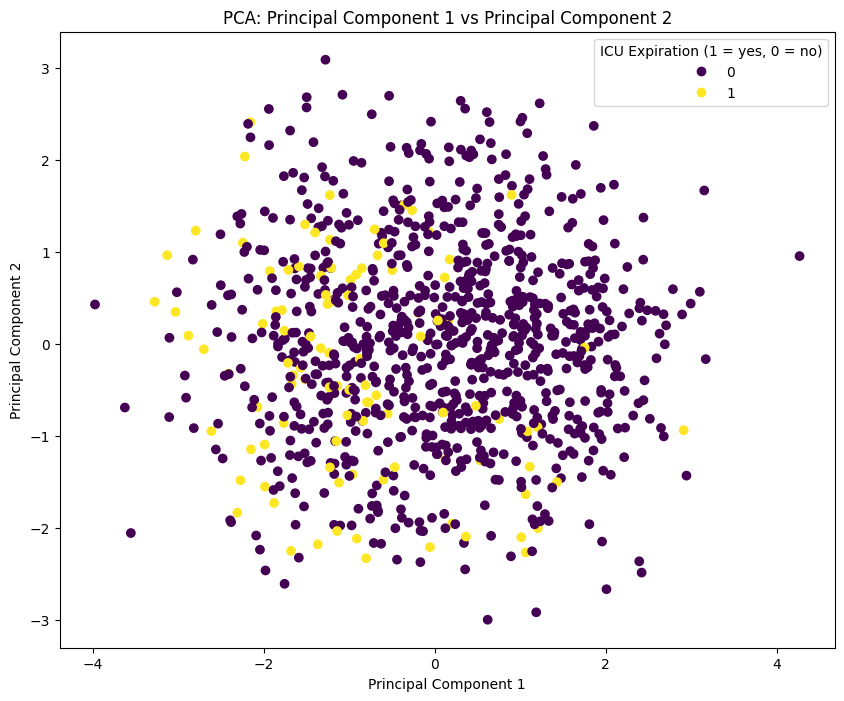

In [50]:
# Select variables for PCA
selected_variables_pca = ['age', 'bmi', 'sapsi_first', 'sofa_first', 'map_1st', 'hr_1st']
data_subset = project_clean_selected[selected_variables_pca]

# Separate features (x) and target variable (y)
x = data_subset
y = project_clean_selected['icu_exp_flg']

# Standardize the features
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x)

# Apply PCA with two components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_standardized)

# Create a DataFrame with the principal components and the target variable
pc_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pc_df['icu_exp_flg'] = y

# Visualize the data using a scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pc_df['Principal Component 1'], pc_df['Principal Component 2'], c=pc_df['icu_exp_flg'], cmap='viridis')
plt.title('PCA: Principal Component 1 vs Principal Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='ICU Expiration (1 = yes, 0 = no)') 
plt.show()


### **8. Using Logistic Regression.**

In [30]:
# Split the dataset into features (X) and target variable (y)
X = project_clean_selected.drop(['icu_exp_flg'], axis=1)
y = project_clean_selected['icu_exp_flg']

In [31]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [32]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

C:\Users\thami\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


97.07

In [35]:
# Make predictions on the test set
y_pred_test = logreg.predict(X_test_scaled)

# Evaluate the performance
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_report_test = classification_report(y_test, y_pred_test)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

print("Accuracy on Test Set:", accuracy_test)
print("\nClassification Report:")
print(classification_report_test)
print("\nConfusion Matrix:")
print(confusion_matrix_test)

Accuracy on Test Set: 0.7918781725888325

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87       178
           1       0.32      1.00      0.48        19

    accuracy                           0.79       197
   macro avg       0.66      0.88      0.68       197
weighted avg       0.93      0.79      0.83       197


Confusion Matrix:
[[137  41]
 [  0  19]]


C:\Users\thami\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


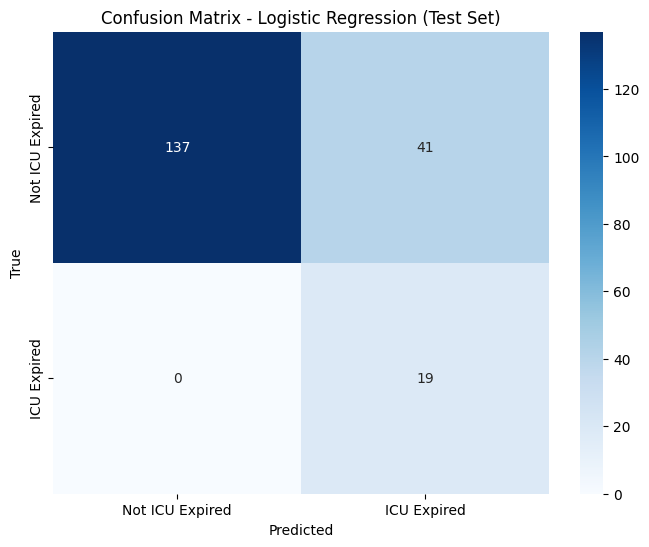

In [36]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not ICU Expired', 'ICU Expired'], 
            yticklabels=['Not ICU Expired', 'ICU Expired'])
plt.title('Confusion Matrix - Logistic Regression (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()